In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
# T-Test
# Import libraries for statistical tests
from scipy.stats import ttest_ind

# Filter data for the two species (e.g., setosa and versicolor)
setosa = data[data['species'] == 'setosa']['petal length (cm)']
versicolor = data[data['species'] == 'versicolor']['petal length (cm)']

# Perform the independent t-test
t_stat, p_value = ttest_ind(setosa, versicolor)

# Display the results
print("T-Test Results:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


T-Test Results:
T-Statistic: -39.492719391538095, P-Value: 5.404910513441677e-62
Reject the null hypothesis: The means are significantly different.


In [9]:
# Z-Test (Test if the mean sepal length equals a specific value, e.g., 5.0)
# Import ztest function
from statsmodels.stats.weightstats import ztest

# Filter data for one species (e.g., setosa)
setosa_sepal_length = data[data['species'] == 'setosa']['sepal length (cm)']

# Perform the Z-test
z_stat, p_value = ztest(setosa_sepal_length, value=5.0)

# Display the results
print("Z-Test Results:")
print(f"Z-Statistic: {z_stat}, P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: The mean is significantly different from 5.0.")
else:
    print("Fail to reject the null hypothesis: The mean is not significantly different from 5.0.")


Z-Test Results:
Z-Statistic: 0.12036212238318056, P-Value: 0.9041962951772449
Fail to reject the null hypothesis: The mean is not significantly different from 5.0.


In [10]:
# ANOVA (Compare mean petal widths across all three species)
# Import libraries for ANOVA
from scipy.stats import f_oneway

# Separate petal widths for all three species
setosa_petal_width = data[data['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = data[data['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = data[data['species'] == 'virginica']['petal width (cm)']

# Perform the ANOVA test
f_stat, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Display the results
print("ANOVA Results:")
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: At least one mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: All means are equal.")


ANOVA Results:
F-Statistic: 960.007146801809, P-Value: 4.169445839443116e-85
Reject the null hypothesis: At least one mean is significantly different.


Correlation Results:
Correlation Coefficient: 0.8717537758865831, P-Value: 1.0386674194498827e-47
Regression Equation: y = 1.86x + -7.10


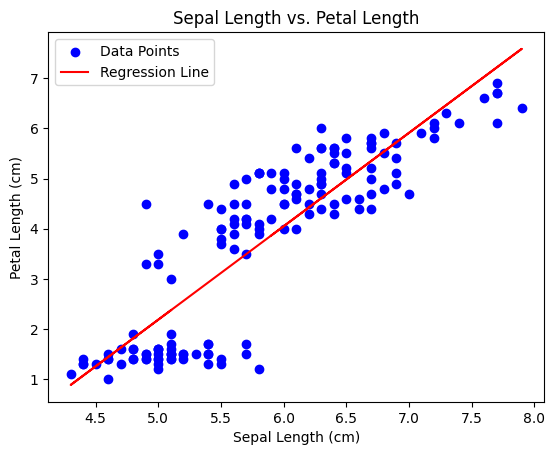

In [11]:
# Correlation/Regression
# Import libraries for correlation and regression
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract variables
sepal_length = data['sepal length (cm)']
petal_length = data['petal length (cm)']

# Calculate correlation
correlation, p_value = pearsonr(sepal_length, petal_length)
print("Correlation Results:")
print(f"Correlation Coefficient: {correlation}, P-Value: {p_value}")

# Perform regression analysis
X = sepal_length.values.reshape(-1, 1)  # Reshape for sklearn
y = petal_length

reg = LinearRegression()
reg.fit(X, y)

# Get regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_

print(f"Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

# Plot the relationship
plt.scatter(sepal_length, petal_length, color='blue', label='Data Points')
plt.plot(sepal_length, reg.predict(X), color='red', label='Regression Line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs. Petal Length')
plt.legend()
plt.show()
